In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict.csv')
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [4]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit'] > .8 

In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Making object decision tree
decision_tree = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01, criterion='gini')

#fitting model
decision_tree.fit(X_train, y_train)

# predicting
y_pred = decision_tree.predict(X_test)

# score of the model decision tree
print(decision_tree.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

0.9375
0.9375


|--- cgpa <= 9.01
|   |--- cgpa <= 8.92
|   |   |--- class: False
|   |--- cgpa >  8.92
|   |   |--- class: False
|--- cgpa >  9.01
|   |--- university_rating <= 3.50
|   |   |--- class: True
|   |--- university_rating >  3.50
|   |   |--- class: True



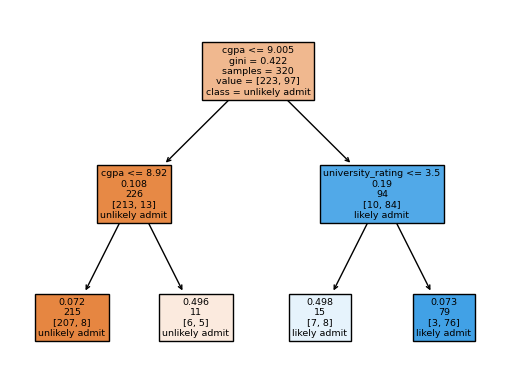

In [21]:
tree.plot_tree(decision_tree, feature_names=X_train.columns,
               max_depth=3, class_names=['unlikely admit', 'likely admit'],
               label='root', filled=True)

print(tree.export_text(decision_tree, feature_names=X.columns.tolist()))

In [23]:
def gini(data):
    """Calculate the gini umpurity score"""
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

gi = gini(y_train)
print(f'Gini impurity at root: {round(gi,3)}')

Gini impurity at root: 0.422


In [24]:
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node / split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches"""
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1-w) * gini(right)

In [26]:
info_gain_list = []
for i in X_train.cgpa.unique():
    left = y_train[X_train.cgpa<=i]
    right = y_train[X_train.cgpa>i]
    info_gain_list.append([i, info_gain(left, right, gi)])

ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)
ig_table.head(10)

,split_value,info_gain
21,9.00,0.290053
18,8.90,0.289579
152,8.94,0.283959
57,8.96,0.282884
139,8.88,0.280784
5,9.01,0.279192
10,8.84,0.277916
110,8.87,0.276508
44,8.97,0.276427
42,9.02,0.273488


Text(0, 0.5, 'info gain')

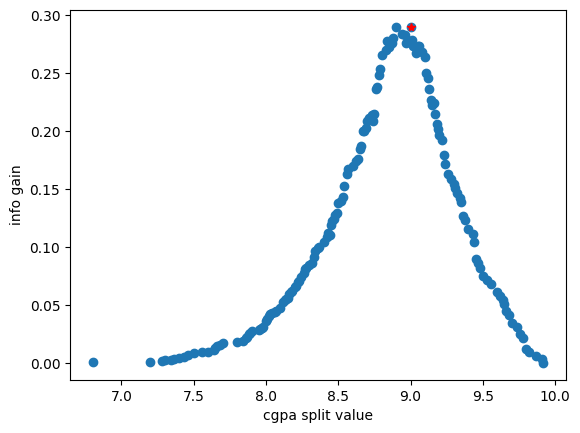

In [29]:
plt.plot(ig_table['split_value'], ig_table['info_gain'], 'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0], 'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')